**Mustapha Wasseja**
**14/06/2019**

## Ordinary Least Squares Estimation

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from __future__ import print_function
%matplotlib inline

Let's begin our OLS estimation.
* First we create an artificial dataset
* Fit the data to the model
* Last interpret our OLS results and also check on if OLS assumptions are not violated
* If any is violated is there a way to rectify that?

In [5]:
np.random.seed(5000000)

In [7]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2)) # x and x-squared
beta = np.array([1, 0.1, 10])
e = np.random.normal(size = nsample)

**Now we set-up our model**

In [8]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [9]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.652e+06
Date:                Fri, 14 Jun 2019   Prob (F-statistic):          2.39e-242
Time:                        18:27:55   Log-Likelihood:                -139.25
No. Observations:                 100   AIC:                             284.5
Df Residuals:                      97   BIC:                             292.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3110      0.291      4.508      0.0

In [19]:
# dir(results)   #to show attributes in ols model

In [13]:
print('Parameters: ', results.params)

Parameters:  [ 1.31098947 -0.08656774 10.0172906 ]


In [18]:
print('R2: ', results.rsquared)
print('Wald: ', results.wald_test_terms)
print('adj.R2: ', results.rsquared_adj)
print('outlier test: ', results.outlier_test)

R2:  0.9999895737293486
Wald:  <bound method LikelihoodModelResults.wald_test_terms of <statsmodels.regression.linear_model.OLSResults object at 0x0000021E8129A358>>
adj.R2:  0.999989358754696
outlier test:  <bound method OLSResults.outlier_test of <statsmodels.regression.linear_model.OLSResults object at 0x0000021E8129A358>>


In [16]:
print('Wald: ', results.wald_test_terms)

Wald:  <bound method LikelihoodModelResults.wald_test_terms of <statsmodels.regression.linear_model.OLSResults object at 0x0000021E8129A358>>


### OLS non-linear estimation

we begin by simulating an artificial data for our exercise

In [20]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.0]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size = nsample)

**Fit the model**

In [21]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     205.6
Date:                Fri, 14 Jun 2019   Prob (F-statistic):           1.20e-26
Time:                        18:48:43   Log-Likelihood:                -35.327
No. Observations:                  50   AIC:                             78.65
Df Residuals:                      46   BIC:                             86.30
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5071      0.027     18.864      0.0

In [22]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

Parameters:  [ 0.50705712  0.36136201 -0.0219844   5.06168725]
Standard errors:  [0.02687961 0.10566689 0.00236005 0.17428839]
Predicted values:  [ 4.51207727  4.94854237  5.3541167   5.70910635  6.00092484  6.22616105
  6.39113963  6.51088191  6.60663793  6.70239511  6.82093719  6.98010093
  7.18984556  7.45061654  7.75327235  8.08058642  8.41007741  8.71770282
  8.98180912  9.18668936  9.32516376  9.39975936  9.4222948   9.41193858
  9.39205971  9.38638824  9.41511653  9.49158163  9.6200741   9.79513305
 10.00244336 10.22118762 10.42746636 10.59822466 10.71504003 10.76714917
 10.7532163  10.68155272 10.56875119 10.43695985 10.3102433  10.21062892
 10.15448774 10.1498448  10.19506064 10.27910065 10.38334801 10.48466243
 10.55918198 10.58624357]


Draw a plot to compare the true relationship to OLS predictions. Confidence intervals around the predictions are built using the `wls_prediction_std` command.

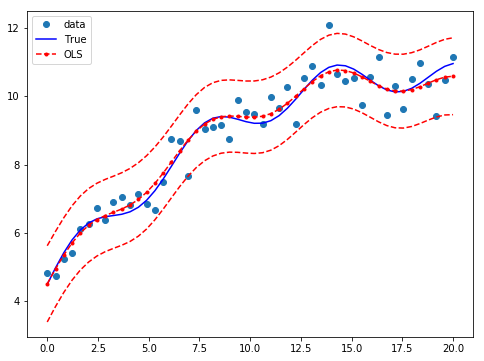

In [23]:
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

### OLS with Dummy variables
We generate some artificial data. There are 3 groups which will be modelled using dummy variables. Group 0 is the omitted/benchmark category.

In [24]:
nsample = 50
groups = np.zeros(nsample, int)
groups[20:40] = 1
groups[40:] = 2
#dummy = (groups[:,None] == np.unique(groups)).astype(float)

dummy = sm.categorical(groups, drop=True)
x = np.linspace(0, 20, nsample)
# drop reference category
X = np.column_stack((x, dummy[:,1:]))
X = sm.add_constant(X, prepend=False)

beta = [1., 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e

In [25]:
print(X[:5,:])
print(y[:5])
print(groups)
print(dummy[:5,:])

[[0.         0.         0.         1.        ]
 [0.40816327 0.         0.         1.        ]
 [0.81632653 0.         0.         1.        ]
 [1.2244898  0.         0.         1.        ]
 [1.63265306 0.         0.         1.        ]]
[10.59204809 10.66815638 11.30730411 12.26913633 10.97341108]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [26]:
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     567.0
Date:                Fri, 14 Jun 2019   Prob (F-statistic):           2.55e-36
Time:                        19:06:59   Log-Likelihood:                -68.429
No. Observations:                  50   AIC:                             144.9
Df Residuals:                      46   BIC:                             152.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7853      0.065     12.152      0.0

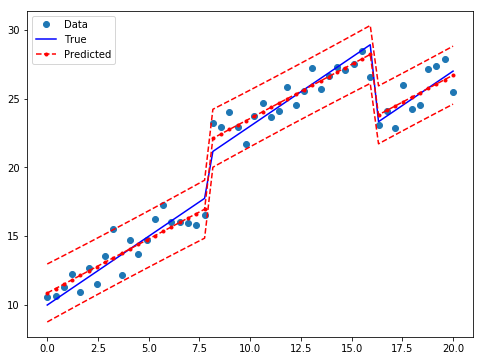

In [27]:
prstd, iv_l, iv_u = wls_prediction_std(res2)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res2.fittedvalues, 'r--.', label="Predicted")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
legend = ax.legend(loc="best")

In [28]:
R = [[0, 1, 0, 0], [0, 0, 1, 0]]
print(np.array(R))
print(res2.f_test(R))

[[0 1 0 0]
 [0 0 1 0]]
<F test: F=array([[127.65813081]]), p=1.6823292863406624e-19, df_denom=46, df_num=2>


In [29]:
print(res2.f_test("x2 = x3 = 0"))

<F test: F=array([[127.65813081]]), p=1.6823292863406624e-19, df_denom=46, df_num=2>


In [30]:
beta = [1., 0.3, -0.0, 10]
y_true = np.dot(X, beta)
y = y_true + np.random.normal(size=nsample)

res3 = sm.OLS(y, X).fit()

In [31]:
print(res3.f_test(R))

<F test: F=array([[1.63819016]]), p=0.20546495732836323, df_denom=46, df_num=2>


In [32]:
print(res3.f_test("x2 = x3 = 0"))

<F test: F=array([[1.63819016]]), p=0.20546495732836267, df_denom=46, df_num=2>


In [34]:
from statsmodels.datasets.longley import load_pandas
y = load_pandas().endog
X = load_pandas().exog
X = sm.add_constant(X)

In [35]:
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Fri, 14 Jun 2019   Prob (F-statistic):           4.98e-10
Time:                        19:09:49   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.482e+06    8.9e+05     -3.911      0.0

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [36]:
norm_x = X.values
for i, name in enumerate(X):
    if name == "const":
        continue
    norm_x[:,i] = X[name]/np.linalg.norm(X[name])
norm_xtx = np.dot(norm_x.T,norm_x)

In [37]:
eigs = np.linalg.eigvals(norm_xtx)
condition_number = np.sqrt(eigs.max() / eigs.min())
print(condition_number)

56240.8709117813


In [38]:
ols_results2 = sm.OLS(y.iloc[:14], X.iloc[:14]).fit()
print("Percentage change %4.2f%%\n"*7 % tuple([i for i in (ols_results2.params - ols_results.params)/ols_results.params*100]))

Percentage change 4.55%
Percentage change -2228.01%
Percentage change 154304695.31%
Percentage change 1366329.02%
Percentage change 1112549.36%
Percentage change 92708715.91%
Percentage change 817944.26%



In [39]:
infl = ols_results.get_influence()

In [40]:
2./len(X)**.5

0.5

In [41]:
print(infl.summary_frame().filter(regex="dfb"))

    dfb_const  dfb_GNPDEFL       dfb_GNP     dfb_UNEMP     dfb_ARMED  \
0   -0.016406  -169.822675  1.673981e+06  54490.318088  51447.824036   
1   -0.020608  -187.251727  1.829990e+06  54495.312977  52659.808664   
2   -0.008382   -65.417834  1.587601e+06  52002.330476  49078.352378   
3    0.018093   288.503914  1.155359e+06  56211.331922  60350.723082   
4    1.871260  -171.109595  4.498197e+06  82532.785818  71034.429294   
5   -0.321373  -104.123822  1.398891e+06  52559.760056  47486.527649   
6    0.315945  -169.413317  2.364827e+06  59754.651394  50371.817827   
7    0.015816   -69.343793  1.641243e+06  51849.056936  48628.749338   
8   -0.004019   -86.903523  1.649443e+06  52023.265116  49114.178265   
9   -1.018242  -201.315802  1.371257e+06  56432.027292  53997.742487   
10   0.030947   -78.359439  1.658753e+06  52254.848135  49341.055289   
11   0.005987  -100.926843  1.662425e+06  51744.606934  48968.560299   
12  -0.135883   -32.093127  1.245487e+06  50203.467593  51148.37

C:\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:323: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:337: RuntimeWarning: invalid value encountered in sqrt
  dffits_ = self.resid_studentized_internal * np.sqrt(hii / (1 - hii))
C:\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:366: RuntimeWarning: invalid value encountered in sqrt
  dffits_ 

**Further *estimation techniques* to be discussed**